In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve
import pickle
from sklearn.ensemble import RandomForestClassifier

In [2]:
DATASET = pickle.load(open('data/MNISTsmall.p', 'rb'))
print(DATASET.keys())
DATA = DATASET.data
print(f'data shape: {DATA.shape}')
TARGET = DATASET.target
print(f'target shape: {TARGET.shape}')

dict_keys(['data', 'target', 'DESCR', 'target_names', 'foldTrain'])
data shape: (784, 15000)
target shape: (15000,)


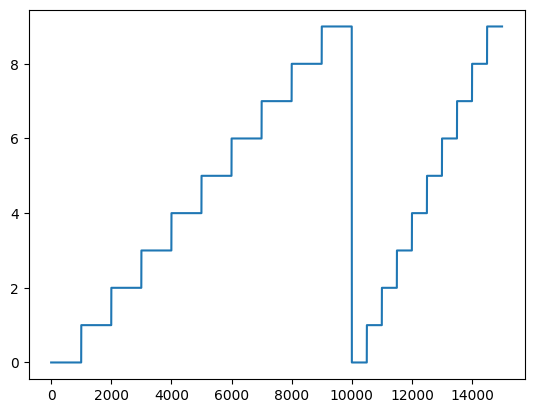

In [3]:
plt.plot(TARGET)

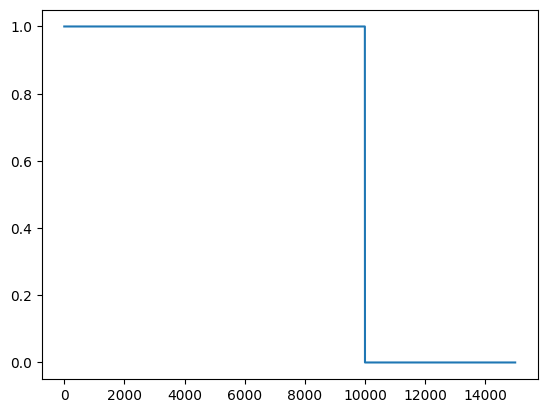

In [4]:
plt.plot(DATASET.foldTrain)

Dick


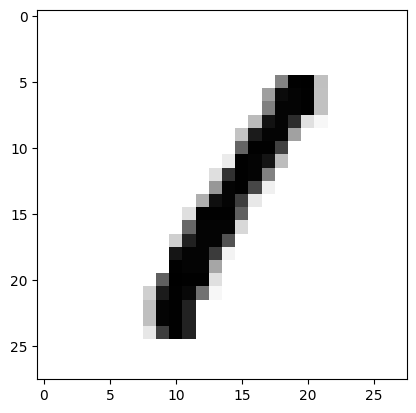

In [5]:
trainFold = DATA[:,:10000]
trainFold_t = TARGET[:10000]
testFold = DATA[:,10000:]
testFold_t = TARGET[10000:]

plt.imshow(trainFold[:,1000].reshape(28,28), cmap='binary')
print('Dick')

np.uint8(5)

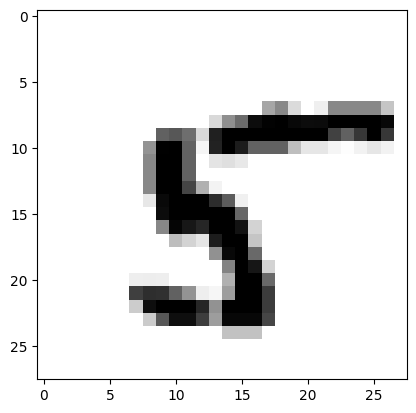

In [6]:
# rf = RandomForestClassifier().fit(trainFold.T, trainFold_t)

idx = np.random.permutation(trainFold.shape[1])
trainFold = trainFold[:,idx]
trainFold_t = trainFold_t[idx]

plt.imshow(trainFold[:,1003].reshape(28,28), cmap='binary')
trainFold_t[1003]

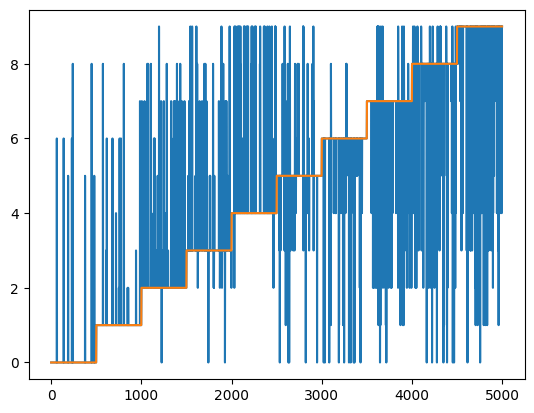

In [7]:
rf = RandomForestClassifier().fit(trainFold.T, trainFold_t)

y2e = rf.predict(testFold.T)
plt.plot(y2e)
plt.plot(testFold_t)

In [8]:
print(np.sum(testFold_t != y2e))
print(np.sum(testFold_t != y2e)/5000)
print(confusion_matrix(testFold_t, y2e))

350
0.07
[[492   0   0   0   0   3   3   0   2   0]
 [  0 486   3   3   1   0   4   1   2   0]
 [  1   0 463  10   2   1   4  12   6   1]
 [  2   0   6 460   0  13   0   9   5   5]
 [  0   0   2   0 464   0   7   0   3  24]
 [  5   1   0   9   5 461   3   3   8   5]
 [ 10   3   1   0   8   4 471   0   3   0]
 [  2   6  20   2   5   0   0 454   2   9]
 [  7   1   9   8   6   4   2   4 447  12]
 [  2   6   2  12  14   1   1   5   5 452]]


In [12]:
P = rf.predict_proba(testFold.T)
P.shape

(5000, 10)

In [13]:
P[:5,:]

array([[0.91, 0.  , 0.03, 0.  , 0.  , 0.01, 0.03, 0.02, 0.  , 0.  ],
       [0.95, 0.  , 0.02, 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.84, 0.  , 0.05, 0.  , 0.01, 0.03, 0.02, 0.  , 0.03, 0.02],
       [0.97, 0.  , 0.02, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  ]])

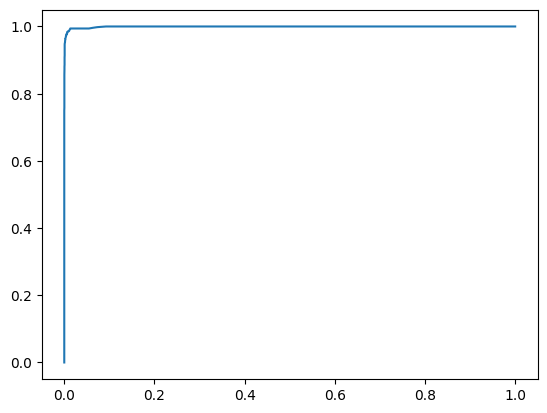

In [ ]:
fp, tp, t = roc_curve((testFold_t==0), P[:,0])
plt.plot(fp, tp)